<a href="https://colab.research.google.com/github/alvaroenrique/ML_course-project1/blob/main/Huamani-ML_Liver_Disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
#   1. mcv	mean corpuscular volume
#   2. alkphos	alkaline phosphotase
#   3. sgpt	alamine aminotransferase
#   4. sgot 	aspartate aminotransferase
#   5. gammagt	gamma-glutamyl transpeptidase
#   6. drinks	number of half-pint equivalents of alcoholic beverages drunk per day
#   7. selector  field used to split data into two sets

data = pd.read_csv("bupa.data", names=["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks", "selector"])
data.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [93]:
# No tiene datos nulos

# sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

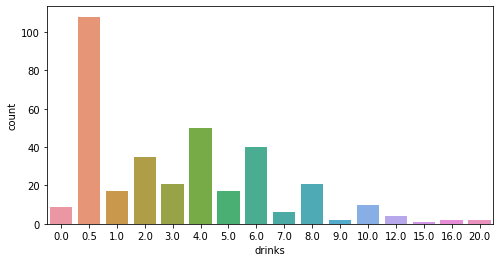

In [94]:
plt.figure(figsize=(8,4))
sns.countplot(x='drinks', data=data)

In [95]:
# Según https://www.richardsandesforsyth.net/pubs/JMRF_DiagnosingDisorder_PRL2016.pdf
# No está claro qué significa "selector" aquí. 
# Se puede concluir que lo "correcto" es usar la variable "drinks" como independiente
# Y de preferencia dicotomizado como x6 > 3, entonces se convierte el dato coninuo de drinks a categórica (0 y 1)
# Es lamentable que estos números se superpongan con los informados anteriormente para la clasificación en x7, ya que, por lo tanto, no es posible echar un vistazo a los números de rendimiento publicados y poder adivinar qué variable se está utilizando.

In [96]:
X = data.drop(["selector", "drinks"], axis="columns")
X.head()

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10


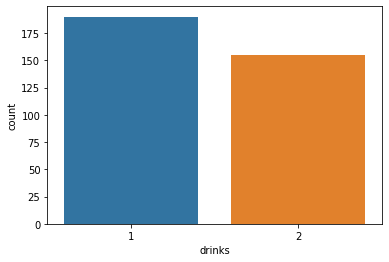

In [97]:
y = data["drinks"].apply(lambda x: 2 if x > 3 else 1 )
y.value_counts()
sns.countplot(x=y)

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
def logisticR(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  logmodel = LogisticRegression()

  logmodel.fit(X_train, y_train)

  pred = logmodel.predict(X_test)

  print(confusion_matrix(y_test, pred))

  print(classification_report(y_test, pred))

  scores = cross_val_score(logmodel, X, y, cv=10, scoring='accuracy').mean()
  print(f"Cross validation mean: {scores}")

  #newpred = logmodel.predict(X)
  #print(classification_report(data["selector"], newpred))

In [100]:
logisticR(X, y)

[[49  7]
 [30 18]]
              precision    recall  f1-score   support

           1       0.62      0.88      0.73        56
           2       0.72      0.38      0.49        48

    accuracy                           0.64       104
   macro avg       0.67      0.62      0.61       104
weighted avg       0.67      0.64      0.62       104

Cross validation mean: 0.6439495798319328


drinks    1.0
Name: drinks, dtype: float64


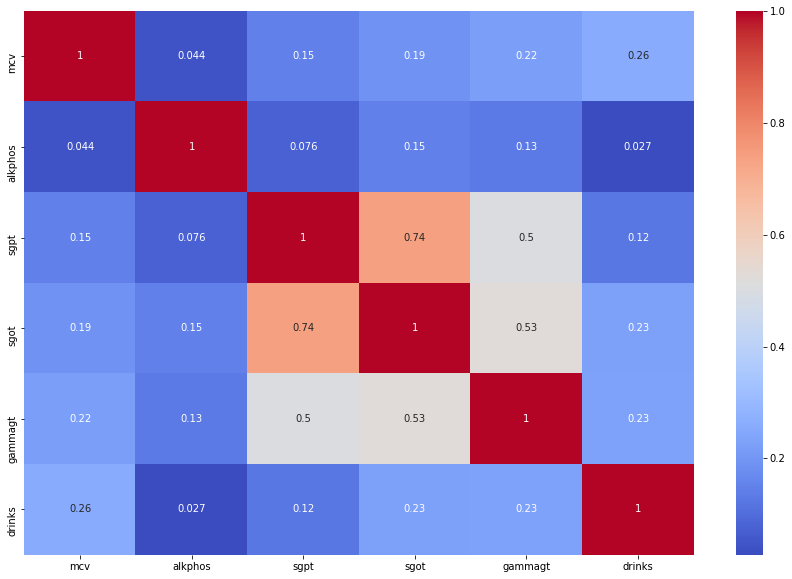

In [101]:
plt.figure(figsize=(15,10))
cor = X.join(y).corr()

sns.heatmap(cor, annot=True, cmap="coolwarm")

cor_target = abs(cor['drinks'])
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

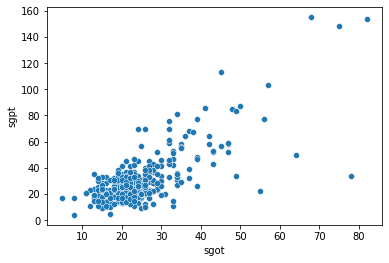

In [102]:
sns.scatterplot(data=X, x="sgot", y="sgpt")

In [103]:
X2 = X.drop(["sgot", "sgpt"], axis="columns")
logisticR(X2, y)

X3 = X.drop(["sgot"], axis="columns")
logisticR(X3, y)

X4 = X.drop(["sgpt"], axis="columns")
logisticR(X4, y)

[[46 10]
 [26 22]]
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        56
           2       0.69      0.46      0.55        48

    accuracy                           0.65       104
   macro avg       0.66      0.64      0.63       104
weighted avg       0.66      0.65      0.64       104

Cross validation mean: 0.6410924369747899
[[43 15]
 [23 23]]
              precision    recall  f1-score   support

           1       0.65      0.74      0.69        58
           2       0.61      0.50      0.55        46

    accuracy                           0.63       104
   macro avg       0.63      0.62      0.62       104
weighted avg       0.63      0.63      0.63       104

Cross validation mean: 0.6382352941176471
[[43 10]
 [31 20]]
              precision    recall  f1-score   support

           1       0.58      0.81      0.68        53
           2       0.67      0.39      0.49        51

    accuracy                           0.

In [104]:
# https://online.stat.psu.edu/stat508/lesson/5/5.4
# Siguiendo la documentación se recomendaría elminar los valores cercanos a 0

def lasso(X,y):
  plt.figure(figsize=(8,10))
  reg = LassoCV(random_state=2)
  reg.fit(X,y)
  coef = pd.Series(reg.coef_, index=X.columns)
  #print(coef)
  coefS =coef.sort_values()
  coefS.plot(kind="barh")
  plt.title("features")

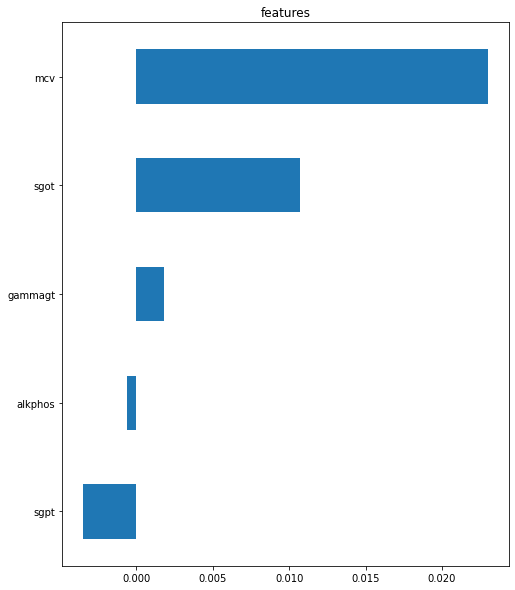

In [105]:
lasso(X, y)

In [106]:
# Al obtener resultados negativos se probará elminando los mismos
X5 = X.drop(["alkphos", "sgpt"], axis="columns")
logisticR(X5, y)

[[51  7]
 [23 23]]
              precision    recall  f1-score   support

           1       0.69      0.88      0.77        58
           2       0.77      0.50      0.61        46

    accuracy                           0.71       104
   macro avg       0.73      0.69      0.69       104
weighted avg       0.72      0.71      0.70       104

Cross validation mean: 0.6498319327731092


In [107]:
X.describe()

,mcv,alkphos,sgpt,sgot,gammagt
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058
std,4.448096,18.347670,19.512309,10.064494,39.254616
min,65.000000,23.000000,4.000000,5.000000,5.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000


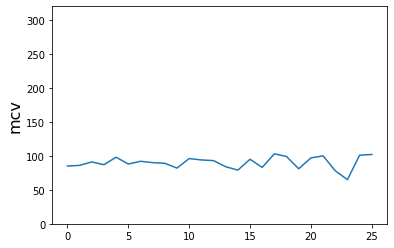

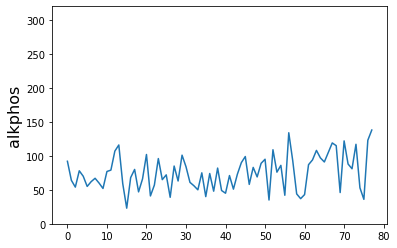

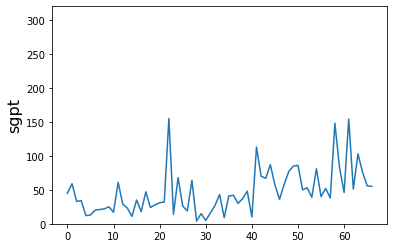

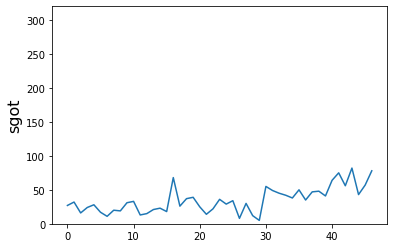

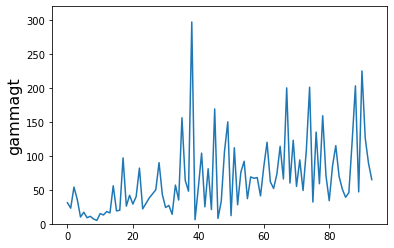

In [108]:
plt.plot(X["mcv"].unique())
plt.ylabel('mcv', fontsize=16)
plt.ylim(0, 320)

plt.show()

plt.plot(X["alkphos"].unique())
plt.ylabel('alkphos', fontsize=16)
plt.ylim(0, 320)
plt.show()

plt.plot(X["sgpt"].unique())
plt.ylabel('sgpt', fontsize=16)
plt.ylim(0, 320)
plt.show()

plt.plot(X["sgot"].unique())
plt.ylabel('sgot', fontsize=16)
plt.ylim(0, 320)
plt.show()

plt.plot(X["gammagt"].unique())
plt.ylabel('gammagt', fontsize=16)
plt.ylim(0, 320)
plt.show()

In [121]:
from sklearn import preprocessing

X6 = X.copy()
X6["mcv"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['gammagt']])[0])
X6["alkphos"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['sgpt']])[0])
X6["sgpt"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['gammagt']])[0])
X6["sgot"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['sgpt']])[0])
X6["gammagt"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['sgpt']])[0])

logisticR(X6, y)



X7 = X.copy()
X7["alkphos"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['sgpt']])[0])
#X7["sgpt"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['gammagt']])[0])
X7["gammagt"] = pd.DataFrame(index=data.index, data=preprocessing.normalize([X['sgpt']])[0])

logisticR(X7, y)

[[56  5]
 [35  8]]
              precision    recall  f1-score   support

           1       0.62      0.92      0.74        61
           2       0.62      0.19      0.29        43

    accuracy                           0.62       104
   macro avg       0.62      0.55      0.51       104
weighted avg       0.62      0.62      0.55       104

Cross validation mean: 0.574201680672269
[[45  2]
 [30 27]]
              precision    recall  f1-score   support

           1       0.60      0.96      0.74        47
           2       0.93      0.47      0.63        57

    accuracy                           0.69       104
   macro avg       0.77      0.72      0.68       104
weighted avg       0.78      0.69      0.68       104

Cross validation mean: 0.6527731092436975


In [126]:
X8 = X7.drop(["alkphos", "sgpt"], axis="columns")

logisticR(X8, y)

[[53  4]
 [26 21]]
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        57
           2       0.84      0.45      0.58        47

    accuracy                           0.71       104
   macro avg       0.76      0.69      0.68       104
weighted avg       0.75      0.71      0.69       104

Cross validation mean: 0.6472268907563026
